# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## NOTE: Do not download the full zip from the link! We provide a special version of this file that has some extra feature engineering for you to do. You won't be able to follow along with the original file!

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Import Library and Starter Code

#### Note: We also provide feature information on the data as a .csv file for easy lookup throughout the notebook:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

%matplotlib inline

In [2]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


## Data

In [6]:
df = pd.read_csv('lending_club_loan_two.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [8]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [9]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [10]:
loan_status_map = {'Fully Paid': 0, 'Charged Off': 1}
df['loan_unrepaid'] = df['loan_status'].map(loan_status_map)

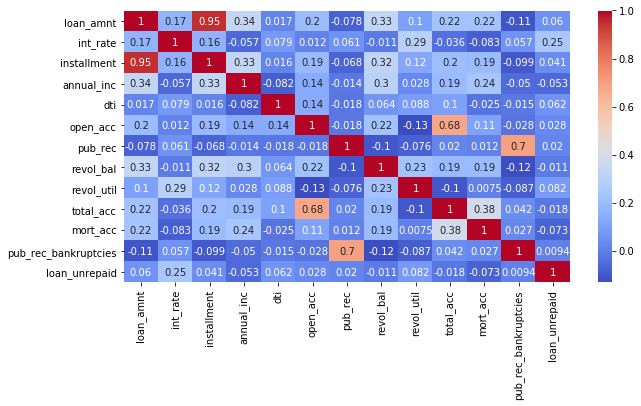

In [11]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

## EDA: Exploratory Data Analysis

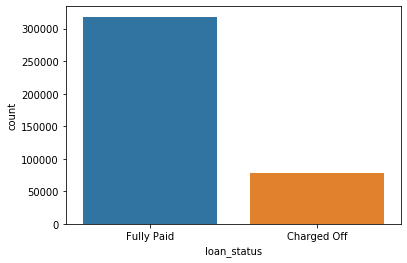

In [12]:
sns.countplot(x='loan_status', data=df)

# Use undersampling or oversampling to overcome unbalance data

([<matplotlib.axis.XTick at 0x12d471cbec8>,
 <a list of 2 Text xticklabel objects>)

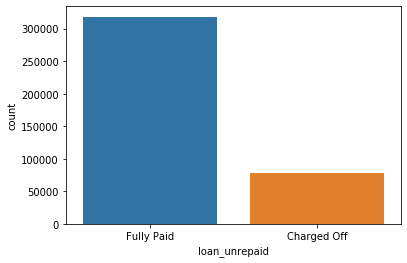

In [13]:
sns.countplot(x='loan_unrepaid', data=df)
plt.xticks([0, 1], ['Fully Paid', 'Charged Off'])  # Set text labels.

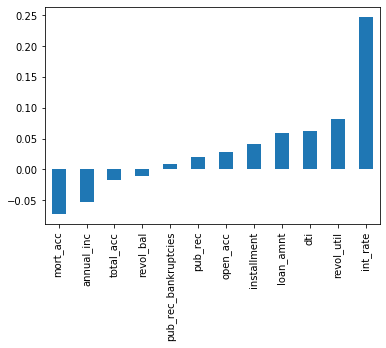

In [14]:
df.corr()['loan_unrepaid'][:-1].sort_values().plot(kind='bar')

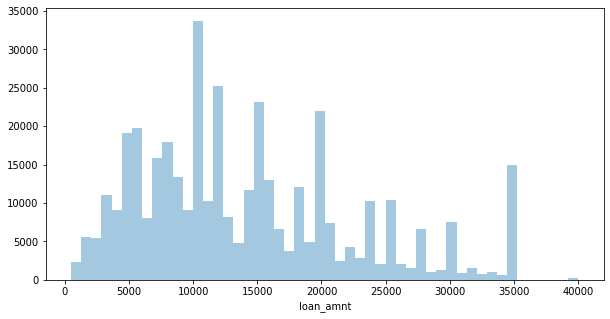

In [15]:
fig, axes = plt.subplots(figsize=(10,5))
sns.distplot(df['loan_amnt'], kde=False, ax=axes)

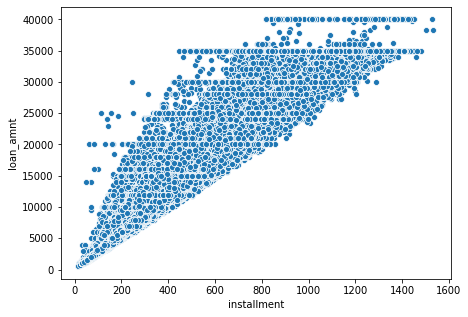

In [16]:
fig, axes = plt.subplots(figsize=(7, 5))
sns.scatterplot(x='installment', y='loan_amnt', data=df)

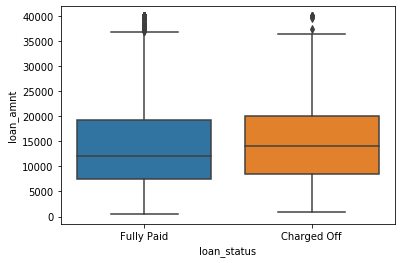

In [17]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

In [18]:
df.groupby('loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [19]:
feat_info('emp_title')
feat_info('emp_length')
feat_info('title')
feat_info('revol_util')
feat_info('mort_acc')
feat_info('pub_rec_bankruptcies')

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
The loan title provided by the borrower
Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
Number of mortgage accounts.
Number of public record bankruptcies


## Preprocessing
#### Guide: 1. Remove or Fill missing data
#### Guide: 2. Change categorical data to numerical data

## Guide 1 Remove or Fill missing data

In [20]:
len(df)

396030

In [21]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_unrepaid               0
dtype: int64

In [22]:
df.isna().sum() / len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.057892
emp_length              0.046211
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.004431
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000697
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.095435
pub_rec_bankruptcies    0.001351
address                 0.000000
loan_unrepaid           0.000000
dtype: float64

In [23]:
feat_info('emp_title')
feat_info('emp_length')
feat_info('title')
feat_info('revol_util')
feat_info('mort_acc')
feat_info('pub_rec_bankruptcies')

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
The loan title provided by the borrower
Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
Number of mortgage accounts.
Number of public record bankruptcies


### Remove or Fill: emp_title column

In [24]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [25]:
df['emp_title'].value_counts()

Teacher                          4389
Manager                          4250
Registered Nurse                 1856
RN                               1846
Supervisor                       1830
                                 ... 
Autosoft, Inc                       1
Food Specialties trading LLC        1
City of Rancho Palos Verdes         1
The Maiman Company                  1
Del One                             1
Name: emp_title, Length: 173105, dtype: int64

In [26]:
df.drop('emp_title', axis=1, inplace=True)

### Remove or Fill: emp_length column

In [27]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [28]:
pd.Series(df['emp_length'].unique()).sort_values().dropna()

10       1 year
0     10+ years
5       2 years
6       3 years
1       4 years
9       5 years
3       6 years
8       7 years
7       8 years
4       9 years
2      < 1 year
dtype: object

In [29]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

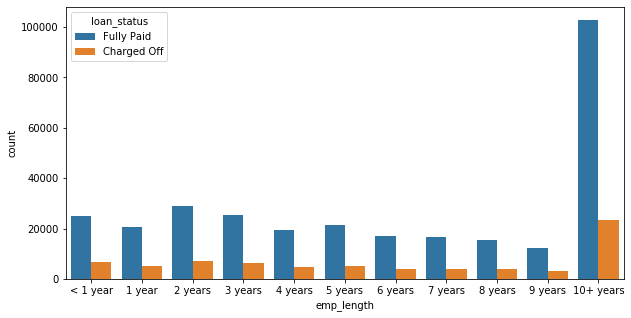

In [30]:
fig, axes = plt.subplots(figsize=(10,5))
sns.countplot(x='emp_length', hue='loan_status', data=df, order=emp_length_order)

In [31]:
emp_co = df[df['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status']
emp_co

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

In [32]:
emp_fp = df[df['loan_status'] == 'Fully Paid'].groupby('emp_length').count()['loan_status']
emp_fp

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_status, dtype: int64

In [33]:
emp_len = emp_co/emp_fp
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

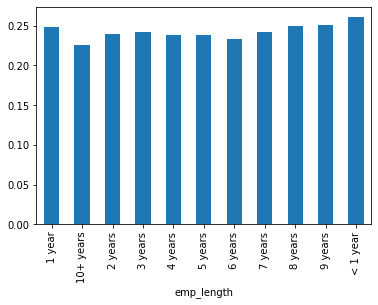

In [34]:
emp_len.plot(kind='bar')

In [35]:
df.drop('emp_length', axis=1, inplace=True)

### Remove or Fill: title column

In [36]:
feat_info('purpose')
feat_info('title')

A category provided by the borrower for the loan request. 
The loan title provided by the borrower


In [37]:
frame = {'purpose':df['purpose'], 'title':df['title']}
pd.DataFrame(frame)

,purpose,title
0,vacation,Vacation
1,debt_consolidation,Debt consolidation
2,credit_card,Credit card refinancing
3,credit_card,Credit card refinancing
4,credit_card,Credit Card Refinance
...,...,...
396025,debt_consolidation,Debt consolidation
396026,debt_consolidation,Debt consolidation
396027,debt_consolidation,pay off credit cards
396028,debt_consolidation,Loanforpayoff


In [38]:
df.drop('title', axis=1, inplace=True)

### Remove or Fill: revol_util column

In [39]:
feat_info('revol_util')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [40]:
df['revol_util'].isna().sum() / len(df)

0.0006969169002348307

In [41]:
df.dropna(subset=['revol_util'], inplace=True)

### Remove or Fill: mort_acc column

In [42]:
feat_info('mort_acc')

Number of mortgage accounts.


In [43]:
df['mort_acc'].isna().sum() / len(df)

0.09536227050137207

In [44]:
df['mort_acc'].mean()

1.8137921980704665

In [45]:
df.corr()['mort_acc']

loan_amnt               0.222381
int_rate               -0.082656
installment             0.193752
annual_inc              0.236277
dti                    -0.025401
open_acc                0.109440
pub_rec                 0.011576
revol_bal               0.195063
revol_util              0.007514
total_acc               0.381205
mort_acc                1.000000
pub_rec_bankruptcies    0.027273
loan_unrepaid          -0.073048
Name: mort_acc, dtype: float64

In [53]:
mort_acc_avg_by_total_acc = df.groupby('total_acc').mean()['mort_acc']
mort_acc_avg_by_total_acc

total_acc
2.0      0.000000
3.0      0.052326
4.0      0.066743
5.0      0.102108
6.0      0.151123
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [56]:
def mort_acc_fillna(mort_acc, total_acc):
    if(np.isnan(mort_acc)):
        return mort_acc_avg_by_total_acc[total_acc]
    else:
        return mort_acc

In [58]:
df['mort_acc'] = df.apply(lambda x : mort_acc_fillna(x['mort_acc'], x['total_acc']), axis=1)

### Remove or Fill: pub_rec_bankruptcies column

In [61]:
df.dropna(subset=['pub_rec_bankruptcies'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  object 
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   grade                 395219 non-null  object 
 5   sub_grade             395219 non-null  object 
 6   home_ownership        395219 non-null  object 
 7   annual_inc            395219 non-null  float64
 8   verification_status   395219 non-null  object 
 9   issue_d               395219 non-null  object 
 10  loan_status           395219 non-null  object 
 11  purpose               395219 non-null  object 
 12  dti                   395219 non-null  float64
 13  earliest_cr_line      395219 non-null  object 
 14  open_acc              395219 non-null  float64
 15  

## Check missing value

In [62]:
df.isna().sum() / len(df)

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
dti                     0.0
earliest_cr_line        0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
initial_list_status     0.0
application_type        0.0
mort_acc                0.0
pub_rec_bankruptcies    0.0
address                 0.0
loan_unrepaid           0.0
dtype: float64

## Guide 2 Change Categorical to Numerical data

In [63]:
df.select_dtypes(include='object')

,term,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,purpose,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,36 months,B,B5,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,36 months,B,B3,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,36 months,A,A2,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\nDelacruzside, MA 00813"
4,60 months,C,C5,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...
396025,60 months,B,B4,RENT,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Nov-2004,w,INDIVIDUAL,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,36 months,C,C1,MORTGAGE,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Feb-2006,f,INDIVIDUAL,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,36 months,B,B1,RENT,Verified,Oct-2013,Fully Paid,debt_consolidation,Mar-1997,f,INDIVIDUAL,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,60 months,C,C2,MORTGAGE,Verified,Aug-2012,Fully Paid,debt_consolidation,Nov-1990,f,INDIVIDUAL,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


### Categorical to Numerical : term column

In [64]:
term_map = {'36 months':36, '60 months':60}
df.replace(to_replace=r"^\s+", value='', regex=True, inplace=True)
df['term'] = df['term'].map(term_map)

C:\Users\ASUS\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
C:\Users\ASUS\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Categorical to Numerical : grade and subgrade column

In [65]:
df.drop('grade', axis=1, inplace=True)

C:\Users\ASUS\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [66]:
sub_grade_dummies = pd.get_dummies(df['sub_grade'])
subgrade_dummies = pd.get_dummies(df['sub_grade'], drop_first=True)
df = pd.concat([df, subgrade_dummies], axis=1)

In [67]:
df.drop('sub_grade', axis=1, inplace=True)

### Categorical to Numerical : home_ownership column

In [68]:
feat_info('home_ownership')

The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER


In [69]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [70]:
home_ownership_dummies = pd.get_dummies(df['home_ownership'])
df = pd.concat([df, home_ownership_dummies], axis=1)

In [71]:
df.drop('home_ownership', axis=1, inplace=True)

### Categorical to Numerical : verification_status column

In [72]:
feat_info('verification_status')

Indicates if income was verified by LC, not verified, or if the income source was verified


In [73]:
df['verification_status'].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [74]:
verification_status_dummies = pd.get_dummies(df['verification_status'])
df = pd.concat([df, verification_status_dummies], axis=1)

In [75]:
df.drop('verification_status', axis=1, inplace=True)

### Categorical to Numerical : issue_d column
****Remove issue_d column because it makes data leakage. we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature****

In [76]:
feat_info('issue_d')

The month which the loan was funded


In [77]:
len(df['issue_d'].value_counts())

112

In [78]:
df.drop('issue_d', axis=1, inplace=True)

### Categorical to Numerical : purpose column

In [81]:
feat_info('purpose')

A category provided by the borrower for the loan request. 


In [82]:
purpose_dummies = pd.get_dummies(df['purpose'])
df = pd.concat([df, purpose_dummies], axis=1)

In [83]:
df.drop('purpose', axis=1, inplace=True)

### Categorical to Numerical : earliest_cr_line column

In [84]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [85]:
len(df['earliest_cr_line'].value_counts())

684

In [86]:
df.drop('earliest_cr_line', axis=1, inplace=True)

### Categorical to Numerical : initial_list_status column

In [87]:
feat_info('initial_list_status')

The initial listing status of the loan. Possible values are – W, F


In [88]:
initial_list_status_dummies = pd.get_dummies(df['initial_list_status'])
df = pd.concat([df, initial_list_status_dummies], axis=1)

In [89]:
df.drop('initial_list_status', axis=1, inplace=True)

### Categorical to Numerical : application_type column

In [90]:
feat_info('application_type')

Indicates whether the loan is an individual application or a joint application with two co-borrowers


In [91]:
df['application_type'].value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [92]:
application_type_dummies = pd.get_dummies(df['application_type'])
df = pd.concat([df, application_type_dummies], axis=1)

In [93]:
df.drop('application_type', axis=1, inplace=True)

### Categorical to Numerical : address column

In [94]:
df.drop('address', axis=1, inplace=True)

## Train Test Split

In [95]:
X = df.drop(['loan_status', 'loan_unrepaid'], axis=1).values
y = df['loan_unrepaid'].values

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Scaling Data

In [97]:
scaler = MinMaxScaler()

In [98]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [99]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating Model 

In [117]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [118]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [119]:
model.fit(x=X_train, y=y_train, 
          epochs=50, verbose=1, callbacks=[early_stop], validation_data=(X_test, y_test))

Train on 276653 samples, validate on 118566 samples
Epoch 1/250
276653/276653 [==============================] - 25s 90us/sample - loss: 0.4669 - val_loss: 0.4606
Epoch 2/250
276653/276653 [==============================] - 23s 82us/sample - loss: 0.4594 - val_loss: 0.4555
Epoch 3/250
276653/276653 [==============================] - 23s 82us/sample - loss: 0.4585 - val_loss: 0.4541
Epoch 4/250
276653/276653 [==============================] - 23s 82us/sample - loss: 0.4578 - val_loss: 0.4539
Epoch 5/250
276653/276653 [==============================] - 23s 82us/sample - loss: 0.4572 - val_loss: 0.4530
Epoch 6/250
276653/276653 [==============================] - 23s 82us/sample - loss: 0.4570 - val_loss: 0.4527
Epoch 7/250
276653/276653 [==============================] - 23s 83us/sample - loss: 0.4562 - val_loss: 0.4528
Epoch 8/250
276653/276653 [==============================] - 23s 82us/sample - loss: 0.4558 - val_loss: 0.4520
Epoch 9/250
276653/276653 [==============================] -

Epoch 74/250
276653/276653 [==============================] - 22s 80us/sample - loss: 0.4481 - val_loss: 0.4507
Epoch 75/250
276653/276653 [==============================] - 22s 80us/sample - loss: 0.4482 - val_loss: 0.4493
Epoch 76/250
276653/276653 [==============================] - 22s 80us/sample - loss: 0.4479 - val_loss: 0.4493
Epoch 77/250
276653/276653 [==============================] - 22s 80us/sample - loss: 0.4478 - val_loss: 0.4501
Epoch 00077: early stopping


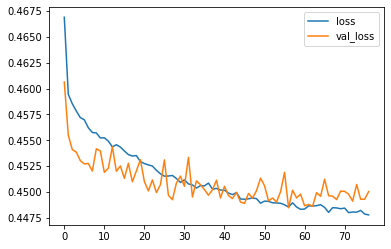

In [120]:
# PLain model
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Model Evaluation

In [121]:
predictions = model.predict_classes(X_test)

In [122]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     95356
           1       0.55      0.03      0.05     23210

    accuracy                           0.81    118566
   macro avg       0.68      0.51      0.47    118566
weighted avg       0.76      0.81      0.73    118566



In [112]:
print(confusion_matrix(y_test, predictions))

[[95212   144]
 [23042   168]]


## Save Model

In [71]:
model.save('third-version_model.h5')